## import packages¶

In [1]:
import pandas as pd
import numpy as np
import sys
import time
from pathlib import Path
import os
import datetime
import pickle 

## set up for imports of .py modules by adding path to sys.path

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/DS5220/assignments/assign_4_distribution


## import python modules

In [3]:
import utils.classification_utils as class_utils_2

## parameters

In [4]:
path_to_model = '2024_12_03_23_42_15_34_model.pkl'
path_to_test_data = 'test_df.csv'

## load the test set

In [5]:
test_df = pd.read_csv(path_to_test_data).set_index(keys='index')
test_df.index.name = None
test_cap_x_df, test_y_df = test_df.iloc[:, :-1], test_df.iloc[:, -1].to_frame()

## load the model and classification threshold and unpack

In [6]:
with open(path_to_model, 'rb') as f:
    model_dict = pickle.load(f)

In [7]:
classification_threshold = model_dict['classification_threshold']
best_model_name = model_dict['best_model_name']
best_model = model_dict['best_model']

## make the grid_search_cv_results_df data frame

In [8]:
estimator_names = [best_model_name]

grid_search_cv_results_df = pd.DataFrame(
    [
        {
            'estimator': best_model_name,
            'best_estimator': best_model
        }
    ]
)

## check out precision and recall performance using bootstrapping


************************************************************
************************************************************
RandomForestClassifier


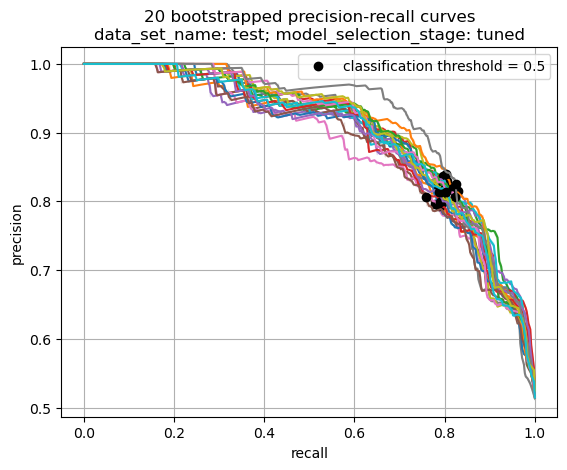


******************************
ave_precision_score



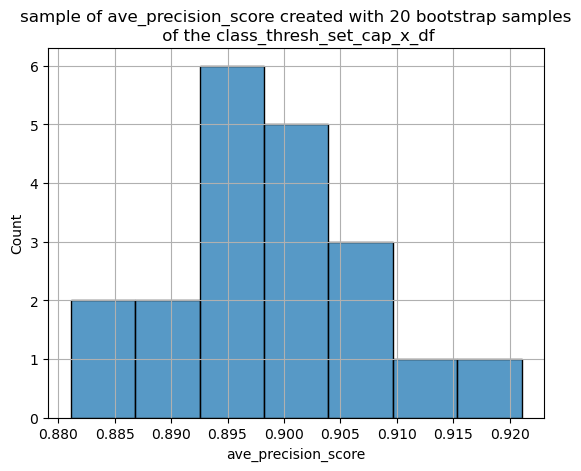


min ave_precision_score: 0.8811138244883648
mean ave_precision_score: 0.8988435155472521
max ave_precision_score: 0.9210406798062152
ave_precision_score percentile based 95% confidence interval ranges from 0.8828 to 0.9120

******************************
precision



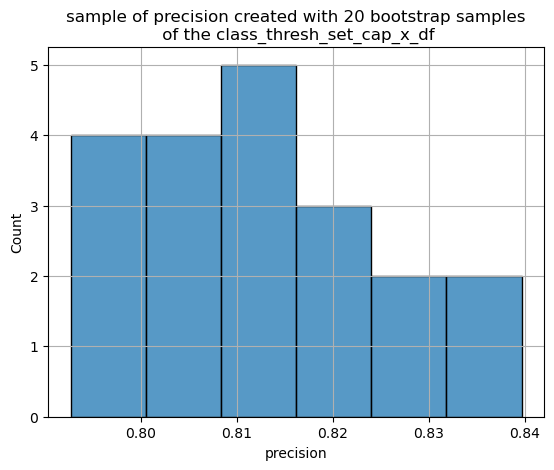


min precision: 0.7926829268292683
mean precision: 0.8135943582567663
max precision: 0.8396624472573839
precision percentile based 95% confidence interval ranges from 0.7950 to 0.8367

******************************
recall



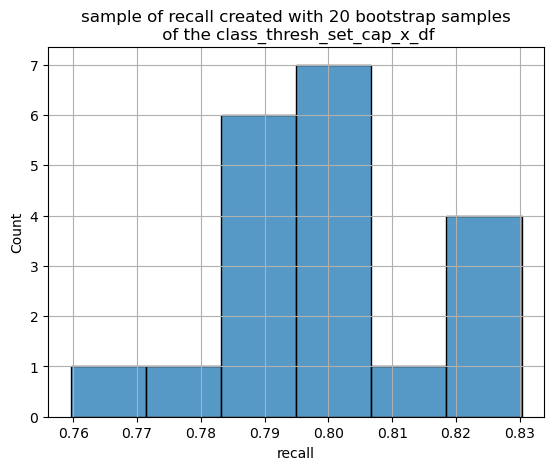


min recall: 0.7595959595959596
mean recall: 0.7995959595959596
max recall: 0.8303030303030303
recall percentile based 95% confidence interval ranges from 0.7769 to 0.8245

 variation of precision and recall across bootstrap (no refit) samples:


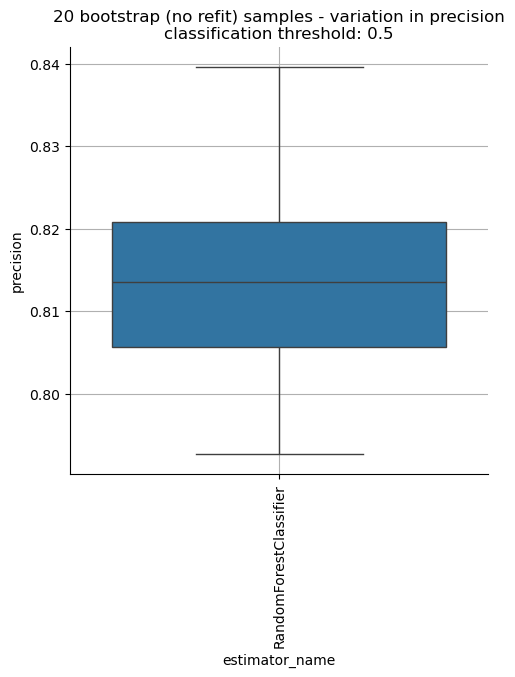

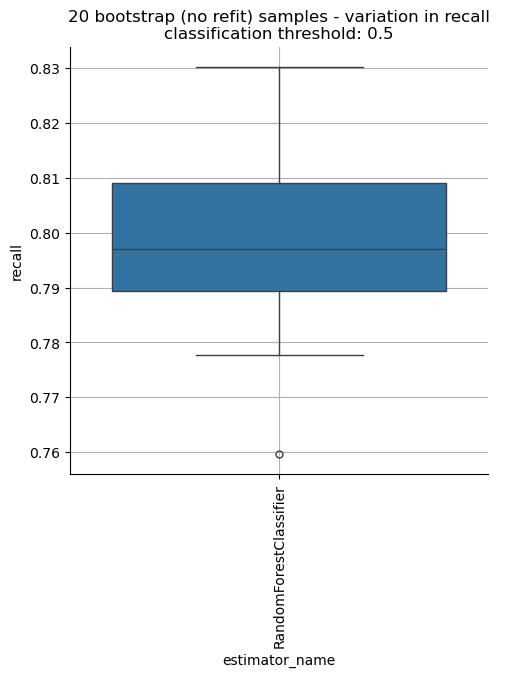

In [9]:
class_utils_2.precision_recall_bootstrap_no_refit_binary(
    best_model_name=best_model_name,
    estimator_names=estimator_names, 
    grid_search_cv_results_df=grid_search_cv_results_df,
    cap_x_df=test_cap_x_df,
    y_df=test_y_df, 
    n_bootstrap=20,
    data_set_name='test', 
    model_selection_stage='tuned',
    classification_threshold=classification_threshold
)

## check out fpr and and tpr (recall)


************************************************************
************************************************************
RandomForestClassifier


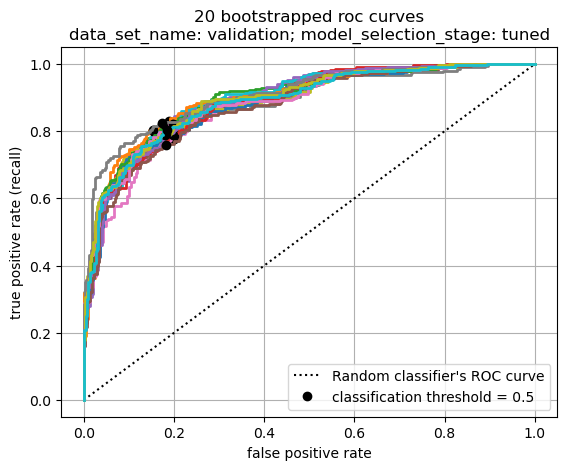


******************************
roc_auc_score_



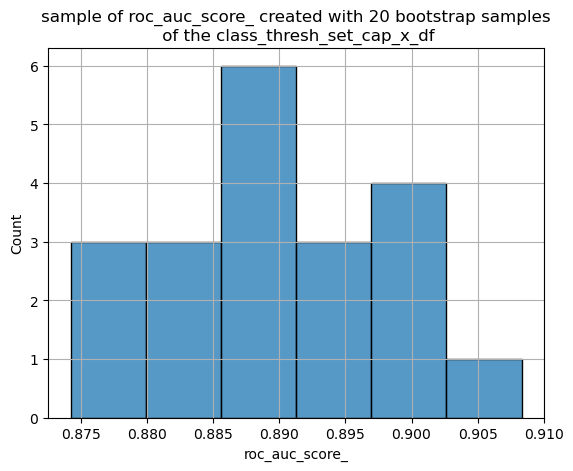


min roc_auc_score_: 0.8742495663707784
mean roc_auc_score_: 0.8897418630751963
max roc_auc_score_: 0.9083154780124477
roc_auc_score_ percentile based 95% confidence interval ranges from 0.8755 to 0.9014

******************************
tpr



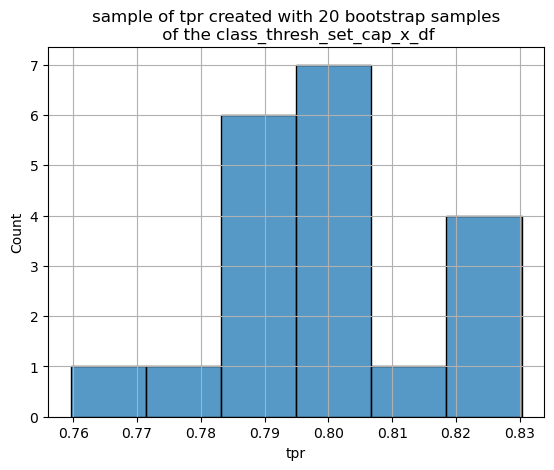


min tpr: 0.7595959595959596
mean tpr: 0.7995959595959596
max tpr: 0.8303030303030303
tpr percentile based 95% confidence interval ranges from 0.7769 to 0.8245

******************************
fpr



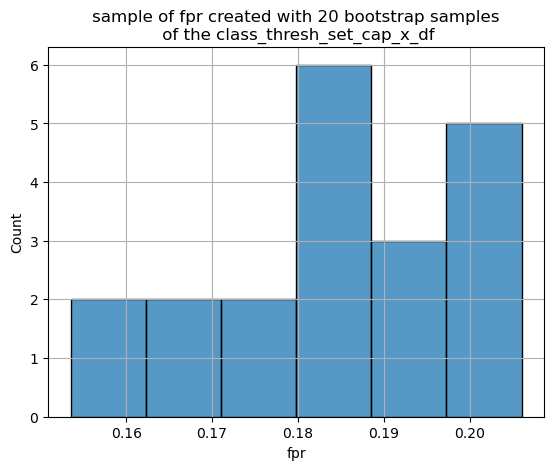


min fpr: 0.15353535353535352
mean fpr: 0.18313131313131312
max fpr: 0.20606060606060606
fpr percentile based 95% confidence interval ranges from 0.1555 to 0.2003

 variation of tpr (recall) and fpr across bootstrap (no refit) samples:


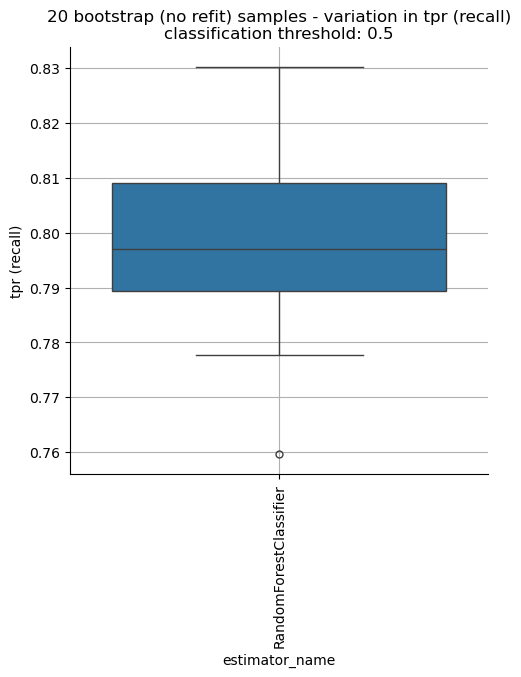

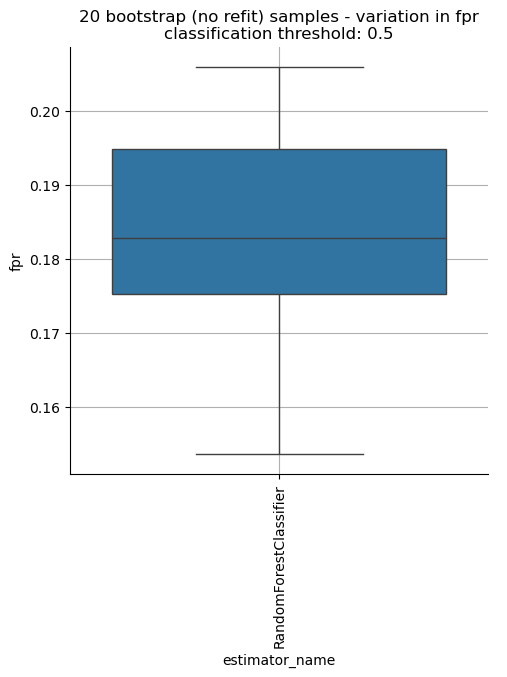

In [10]:
class_utils_2.roc_curve_bootstrap_no_refit_binary(
    best_model_name=best_model_name,
    estimator_names=estimator_names, 
    grid_search_cv_results_df=grid_search_cv_results_df, 
    cap_x_df=test_cap_x_df,
    y_df=test_y_df, 
    n_bootstrap=20,
    data_set_name='validation', 
    model_selection_stage='tuned',
    classification_threshold=classification_threshold
)